# Basic singlet again, this time easier

This is pretty much the same as the basic singlet tutorial, but I've shoved all of the Python into
my ray tracing package.

This time, I'm going to *anticipate* that my design will need optimization and analysis, so I'll
start by adding variables that I plan on using. I'm also going to stop showing 3-d plots, since
we should be comfortable with the simpler 2-d representation.

This tutorial also illustrates my approach to Python development for scientific programming, based
on the DRY (don't repeat yourself) principle. I don't mind writing Python code in Jupyter notebooks,
but if I figure out something that's nice, then I'll think about moving it into one of my packages.
This usually involves a couple of steps:

1. Cleaning up the code, so it's satisfactorily readable
2. Making it more general purpose if possible

I created some "helper" functions in the previous tutorial, with an eye towards making them
general purpose. Then I moved them into the packages, and even created a new package,
**analyze** for this purpose. Then I repeated the main calculations, making it look more like
an actual design progression for a simplistic lens.

And you can see that I'm preparing for doing this again. I renamed my merit function to
**merit_focus_quality()**, making it seem like a basic focus operation should be part
of the general package. Maybe it'll show up in the **optimize** library sooner or later.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# import time

import opticsRayTrace.rayTraceTools as rtt
import opticsRayTrace.drawing as rtd
import opticsRayTrace.optimize as rto
import opticsRayTrace.analyze as rta

In [2]:
surface_list = [
    {
        'surf': 'dummy',
        'dist': 10,
    },
    {
        'surf': 'conic',
        'R': 25,
        'dist': 5,
        'material': 'N-BK7',
        'draw_radius': 12.5,
    },
    {
        'surf': 'conic',
        'curvature': 0,
        'dist': 50,
        'draw_radius': 12.5,
        'variables': ['dist'],
    },
    {
        'surf': 'dummy',
    }
]

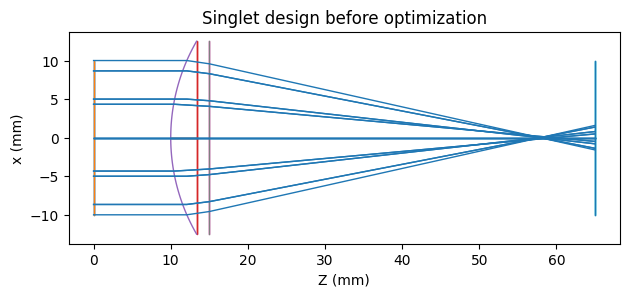

In [3]:
geometry = rtt.build_geometry(surface_list)
ray_table = rtt.ray_table_fields_rings(geometry, 0, 1, 20, 3, [0.000633])
rtt.trace_rays(ray_table, geometry)
axd = rtd.new_plot(axes = ["x"])
rtd.plot_faces(axd, geometry, linewidth = 1)
rtd.plot_rays(axd, geometry, ray_table, linewidth = 1, color_by = "field")
plt.title('Singlet design before optimization')
plt.show()

In [8]:
def merit_focus_quality(params, ray_table, surface_list):
    rto.merit_prepare(params, ray_table, surface_list)
    rmsa = rta.rms_by_field_radial(ray_table)
    merit = np.sqrt(np.average(rmsa**2))

    return merit

result = minimize(merit_focus_quality, [50], (ray_table, surface_list))
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.07055392331725917
        x: [ 4.307e+01]
      nit: 3
      jac: [-4.275e-07]
 hess_inv: [[ 4.040e+00]]
     nfev: 18
     njev: 9

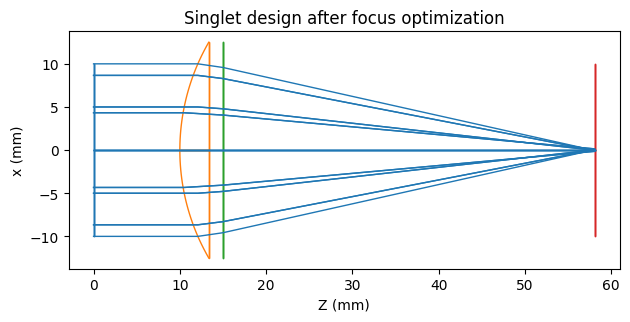

In [14]:
rto.update_values(surface_list, result['x'])
geometry_2 = rtt.build_geometry(surface_list)
rtt.trace_rays(ray_table, geometry_2)
axd = rtd.new_plot(axes = ["x"])
rtd.plot_faces(axd, geometry_2, linewidth = 1)
rtd.plot_rays(axd, geometry_2, ray_table, linewidth = 1, color_by = "field")
plt.title('Singlet design after focus optimization')
plt.show()

In [7]:
rta.focal_length(geometry_2, 20, 0.000633)

45.5635495349682

In [9]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']